In [48]:
import pandas as pd
import string
from nltk.corpus import stopwords
import re
from nltk.tokenize import RegexpTokenizer
from nltk import WordNetLemmatizer, PorterStemmer
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from matplotlib import pyplot as plt

In [49]:
!pip install xgboost

In [50]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\intel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\intel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [52]:
data_df = pd.read_csv("C:/Users/intel/Desktop/deep leering/fake_job_postings.csv")
data_df.value_counts

<bound method DataFrame.value_counts of        job_id                                              title  \
0           1                                   Marketing Intern   
1           2          Customer Service - Cloud Video Production   
2           3            Commissioning Machinery Assistant (CMA)   
3           4                  Account Executive - Washington DC   
4           5                                Bill Review Manager   
...       ...                                                ...   
17875   17876                   Account Director - Distribution    
17876   17877                                 Payroll Accountant   
17877   17878  Project Cost Control Staff Engineer - Cost Con...   
17878   17879                                   Graphic Designer   
17879   17880                         Web Application Developers   

                   location   department salary_range  \
0          US, NY, New York    Marketing          NaN   
1            NZ, , Auckland  

In [53]:
data_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [54]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [55]:
data_df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [56]:
data_df.drop (columns=['job_id','salary_range'], inplace= True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   company_profile      14572 non-null  object
 4   description          17879 non-null  object
 5   requirements         15185 non-null  object
 6   benefits             10670 non-null  object
 7   telecommuting        17880 non-null  int64 
 8   has_company_logo     17880 non-null  int64 
 9   has_questions        17880 non-null  int64 
 10  employment_type      14409 non-null  object
 11  required_experience  10830 non-null  object
 12  required_education   9775 non-null   object
 13  industry             12977 non-null  object
 14  function             11425 non-null  object
 15  fraudulent           17880 non-null  int64 
dtypes: i

In [57]:
data_df.fillna(" ", inplace = True)
data_df.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [58]:
data_df['text'] = data_df['title'] + ' ' + data_df['location'] + ' ' + data_df['department'] + ' '+ data_df['company_profile'] + ' ' + data_df['description'] + ' ' + data_df['requirements'] + ' ' +data_df['benefits'] + ' ' + data_df['employment_type'] + ' ' + data_df['required_education'] + ' '+ data_df['industry'] + ' ' + data_df['function']

In [59]:
data_df['text'].head()

0    Marketing Intern US, NY, New York Marketing We...
1    Customer Service - Cloud Video Production NZ, ...
2    Commissioning Machinery Assistant (CMA) US, IA...
3    Account Executive - Washington DC US, DC, Wash...
4    Bill Review Manager US, FL, Fort Worth   SpotS...
Name: text, dtype: object

In [60]:
data_df.text[1]

"Customer Service - Cloud Video Production NZ, , Auckland Success 90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest in

In [61]:
data_df.drop(columns = ['title', 'location', 'department',
                        'company_profile' ,'description' , 'requirements' ,'benefits',              
'telecommuting' ,
'has_company_logo',
'has_questions',          
'employment_type',        
'required_experience',    
'required_education',     
'industry',            
'function' ], inplace = True)

In [62]:
# function to convert the text to lower case
def convert_to_lowercase(text):
    return text.str.lower()

In [63]:
# function to remove punctuations from the text
def remove_punctuations(text):
    eng_punctuation = string.punctuation
    translator = str.maketrans('','', eng_punctuation)
    return str(text).translate(translator)

In [64]:
# function to remove stopwords from the text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return " ".join([word for word in str(text).split() if word not in stop_words])

In [65]:
# function to remove repeating characters
def remove_repeating_characters(text):
    return re.sub(r'(.)1+', r'1', text)

In [66]:
# function to remove numeric text
def remove_numeric(text):
    return re.sub('[0-9]+', '', text)

In [67]:
# Tokenizing the text
def tokenize_text(text):
    tokenizer = RegexpTokenizer('\w+')
    text = text.apply(tokenizer.tokenize)
    return text

In [68]:
# lemmatizing the text. Converting some of the words to their root form. 
def text_lematization(text):
    lm = WordNetLemmatizer()
    text = [lm.lemmatize(word) for word in text]
    return text 

In [69]:
x = data_df['text']
y = data_df['fraudulent']

In [70]:
x.head()

0    Marketing Intern US, NY, New York Marketing We...
1    Customer Service - Cloud Video Production NZ, ...
2    Commissioning Machinery Assistant (CMA) US, IA...
3    Account Executive - Washington DC US, DC, Wash...
4    Bill Review Manager US, FL, Fort Worth   SpotS...
Name: text, dtype: object

In [71]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraudulent, dtype: int64

In [72]:
def preprocess(text):
    text = convert_to_lowercase(text)
    text = text.apply(lambda x : remove_punctuations(x))
    text = text.apply(lambda x : remove_stopwords(x))
    text = text.apply(lambda x : remove_repeating_characters(x))
    text = text.apply(lambda x : remove_numeric(x))
    text = tokenize_text(text)
    text = text.apply(lambda x : text_lematization(x))
    text = text.apply(lambda x: " ".join(x))
    return text

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [74]:
x_train = preprocess(x_train)

In [75]:
x_test = preprocess(x_test)

In [76]:
vectorizer = TfidfVectorizer(max_features = 300000)
vectorizer.fit(x_train)

TfidfVectorizer(max_features=300000)

In [77]:
x_train = vectorizer.transform(x_train)

In [78]:
x_test = vectorizer.transform(x_test)

In [79]:
#model
De_tree_model = tree.DecisionTreeClassifier()
#fit
De_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [80]:
y_predict_dt = De_tree_model.predict(x_test)
y_predict_dt

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [81]:
print(classification_report(y_test, y_predict_dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5093
           1       0.78      0.76      0.77       271

    accuracy                           0.98      5364
   macro avg       0.88      0.87      0.88      5364
weighted avg       0.98      0.98      0.98      5364



In [82]:
y_predict_dt_train = De_tree_model.predict(x_train)
y_predict_dt

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [83]:
print(classification_report(y_train, y_predict_dt_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11921
           1       1.00      1.00      1.00       595

    accuracy                           1.00     12516
   macro avg       1.00      1.00      1.00     12516
weighted avg       1.00      1.00      1.00     12516



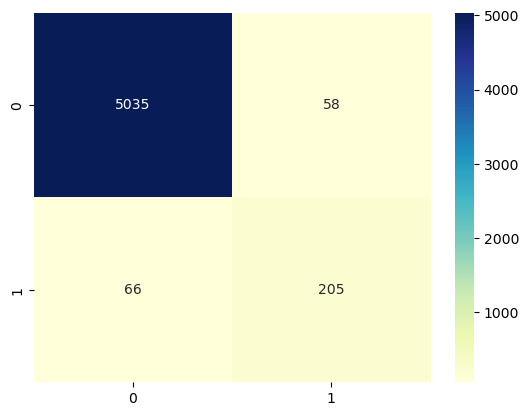

In [84]:
cm = confusion_matrix(y_test, y_predict_dt)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [85]:
#lr model
lr_model = LogisticRegression()
#fit
lr_model.fit(x_train, y_train)

LogisticRegression()

In [86]:
#pred
lr_predict = lr_model.predict(x_test)

In [87]:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5093
           1       1.00      0.39      0.56       271

    accuracy                           0.97      5364
   macro avg       0.98      0.70      0.77      5364
weighted avg       0.97      0.97      0.96      5364



In [88]:
y_pred_trina = lr_model.predict(x_train)
y_predict_dt


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [89]:
print(classification_report(y_train, y_pred_trina))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99     11921
           1       1.00      0.42      0.59       595

    accuracy                           0.97     12516
   macro avg       0.99      0.71      0.79     12516
weighted avg       0.97      0.97      0.97     12516



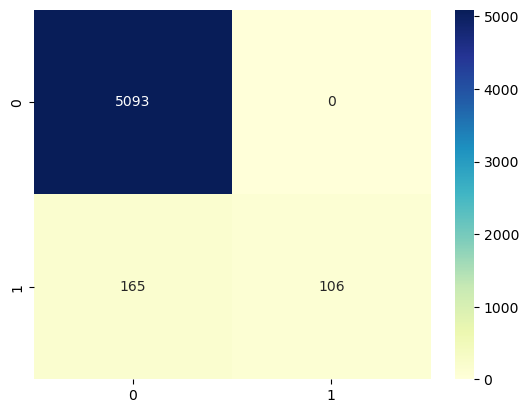

In [90]:
cm = confusion_matrix(y_test, lr_predict)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [91]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [92]:
y_pred_rf = rf_model.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5093
           1       1.00      0.61      0.76       271

    accuracy                           0.98      5364
   macro avg       0.99      0.81      0.87      5364
weighted avg       0.98      0.98      0.98      5364



In [93]:
y_pred_rf = rf_model.predict(x_train)
print(classification_report(y_train, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11921
           1       1.00      1.00      1.00       595

    accuracy                           1.00     12516
   macro avg       1.00      1.00      1.00     12516
weighted avg       1.00      1.00      1.00     12516



In [96]:
#model
xg_model = XGBClassifier()
#fit
xg_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [97]:
xg_pred = xg_model.predict(x_test)
print(classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5093
           1       0.98      0.70      0.82       271

    accuracy                           0.98      5364
   macro avg       0.98      0.85      0.90      5364
weighted avg       0.98      0.98      0.98      5364



In [98]:
xg_pred_train = xg_model.predict(x_train)
print(classification_report(y_train, xg_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11921
           1       1.00      0.99      0.99       595

    accuracy                           1.00     12516
   macro avg       1.00      0.99      1.00     12516
weighted avg       1.00      1.00      1.00     12516



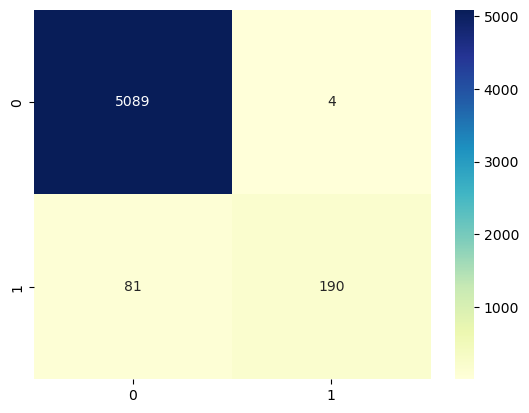

In [99]:
cm = confusion_matrix(y_test, xg_pred)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [100]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [101]:
svm_pred = svm_model.predict(x_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5093
           1       1.00      0.62      0.76       271

    accuracy                           0.98      5364
   macro avg       0.99      0.81      0.88      5364
weighted avg       0.98      0.98      0.98      5364



In [102]:
train_svm_pred = svm_model.predict(x_train)
print(classification_report(y_train, train_svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11921
           1       1.00      0.90      0.95       595

    accuracy                           1.00     12516
   macro avg       1.00      0.95      0.97     12516
weighted avg       1.00      1.00      1.00     12516



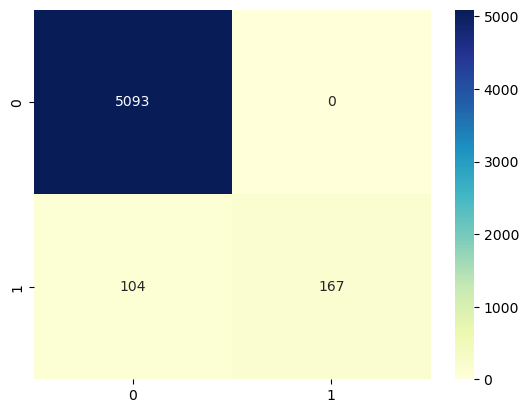

In [103]:
cm = confusion_matrix(y_test, svm_pred)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [104]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5093
           1       0.89      0.72      0.80       271

    accuracy                           0.98      5364
   macro avg       0.94      0.86      0.89      5364
weighted avg       0.98      0.98      0.98      5364



c:\Users\intel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [109]:
y_pred = knn_model.predict(x_train)
print(classification_report(y_train, y_pred))

c:\Users\intel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11921
           1       0.92      0.77      0.84       595

    accuracy                           0.99     12516
   macro avg       0.96      0.88      0.92     12516
weighted avg       0.99      0.99      0.99     12516

